# Netflix Listings Classification Project


### Project Description
The goal of this project is to build a model to classify Netflix listings as either "Movies" or "TV Shows" based on features such as release year, genre, rating, and duration. The dataset contained 6,234 entries with information about various shows on Netflix, including their type, genre, release year, rating, director, cast, and more.
I implemented a Logistic Regression model.


### Import Librairies
Import libraries for data manipulation, visualization, and modeling.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

### Load and Explore the data
Load the Netflix dataset and explore its structure.

In [27]:
df = pd.read_csv('netflix_data_extrat_credit_project.csv')

Display Basic information about the data

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   release_year  6234 non-null   int64 
 3   genre         6234 non-null   object
 4   rating        6224 non-null   object
 5   duration      6234 non-null   object
 6   title         6234 non-null   object
 7   director      4265 non-null   object
 8   cast          5664 non-null   object
 9   date_added    6222 non-null   object
 10  country       5758 non-null   object
dtypes: int64(2), object(9)
memory usage: 535.9+ KB


Display head and Tail of the dataset

In [29]:
head = df.head()
tail = df.tail()
display(head, tail)

,show_id,type,release_year,genre,rating,duration,title,director,cast,date_added,country
0,80185375,Movie,2018,"Dramas, International Movies",TV-MA,122 min,Teenage Mutant Ninja Turtles: The Movie,Steve Barron,"Judith Hoag, Elias Koteas, Josh Pais, Michelan...",28-Dec-18,"Uruguay, Argentina, Spain"
1,81035749,Movie,2015,"Dramas, Faith & Spirituality",TV-14,205 min,Tremors 2: Aftershocks,S.S. Wilson,"Fred Ward, Chris Gartin, Helen Shaver, Michael...",19-Oct-18,"United States, United Kingdom, Morocco"
2,81213153,Movie,2017,"Documentaries, International Movies, Sports Mo...",TV-14,81 min,National Lampoon's Loaded Weapon 1,Gene Quintano,"Emilio Estevez, Samuel L. Jackson, Jon Lovitz,...",15-Dec-19,"United States, South Africa"
3,81143771,Movie,2019,"Documentaries, International Movies",TV-MA,59 min,Jis Desh Men Ganga Behti Hai,Radhu Karmakar,"Raj Kapoor, Padmini, Pran, Chanchal, Lalita Pa...",5-Aug-19,"United States, Japan"
4,80994807,Movie,2014,"Documentaries, Sports Movies",TV-G,49 min,The Naked Gun 2 1/2: The Smell of Fear,David Zucker,"Leslie Nielsen, Priscilla Presley, George Kenn...",27-Jun-18,"United States, France"


,show_id,type,release_year,genre,rating,duration,title,director,cast,date_added,country
6229,1145882,Movie,1973,"Action & Adventure, International Movies",NR,81 min,Beavis and Butt-head Do America,Mike Judge,"Mike Judge, Bruce Willis, Demi Moore, Cloris L...",1-Nov-16,Hong Kong
6230,1067876,Movie,1969,"Classic Movies, Dramas",G,128 min,Barsaat,Rajkumar Santoshi,"Twinkle Khanna, Bobby Deol, Danny Denzongpa, R...",1-Jan-20,United States
6231,1065372,Movie,1996,Thrillers,R,94 min,La Bamba,Luis Valdez,"Lou Diamond Phillips, Esai Morales, Rosanna De...",1-Jan-18,United States
6232,1008581,Movie,1981,"Classic Movies, Comedies, Cult Movies",R,106 min,Bad Boys,Michael Bay,"Will Smith, Martin Lawrence, T??a Leoni, Tch??...",1-Sep-19,United States
6233,1005494,Movie,1946,"Classic Movies, Dramas, Thrillers",TV-PG,94 min,Amar Akbar Anthony,Manmohan Desai,"Vinod Khanna, Rishi Kapoor, Amitabh Bachchan, ...",19-Jul-18,United States


### Visualize the distribution of the target variable
Plot the distribution of 'type' (Movie vs. TV Show)

<ipython-input-30-fc7fa3f84eb2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


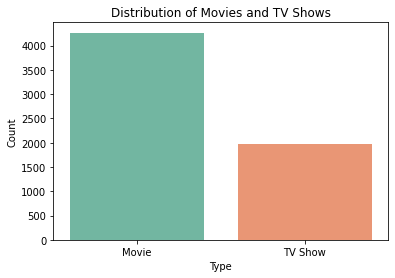

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

### Handle missing values
Check for missing values

In [31]:
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
show_id            0
type               0
release_year       0
genre              0
rating            10
duration           0
title              0
director        1969
cast             570
date_added        12
country          476
dtype: int64


Fill missing values in the 'rating' column with 'Unknown'

In [32]:
df['rating'] = df['rating'].fillna('Unknown')
display(df)

,show_id,type,release_year,genre,rating,duration,title,director,cast,date_added,country
0,80185375,Movie,2018,"Dramas, International Movies",TV-MA,122 min,Teenage Mutant Ninja Turtles: The Movie,Steve Barron,"Judith Hoag, Elias Koteas, Josh Pais, Michelan...",28-Dec-18,"Uruguay, Argentina, Spain"
1,81035749,Movie,2015,"Dramas, Faith & Spirituality",TV-14,205 min,Tremors 2: Aftershocks,S.S. Wilson,"Fred Ward, Chris Gartin, Helen Shaver, Michael...",19-Oct-18,"United States, United Kingdom, Morocco"
2,81213153,Movie,2017,"Documentaries, International Movies, Sports Mo...",TV-14,81 min,National Lampoon's Loaded Weapon 1,Gene Quintano,"Emilio Estevez, Samuel L. Jackson, Jon Lovitz,...",15-Dec-19,"United States, South Africa"
3,81143771,Movie,2019,"Documentaries, International Movies",TV-MA,59 min,Jis Desh Men Ganga Behti Hai,Radhu Karmakar,"Raj Kapoor, Padmini, Pran, Chanchal, Lalita Pa...",5-Aug-19,"United States, Japan"
4,80994807,Movie,2014,"Documentaries, Sports Movies",TV-G,49 min,The Naked Gun 2 1/2: The Smell of Fear,David Zucker,"Leslie Nielsen, Priscilla Presley, George Kenn...",27-Jun-18,"United States, France"
...,...,...,...,...,...,...,...,...,...,...,...
6229,1145882,Movie,1973,"Action & Adventure, International Movies",NR,81 min,Beavis and Butt-head Do America,Mike Judge,"Mike Judge, Bruce Willis, Demi Moore, Cloris L...",1-Nov-16,Hong Kong
6230,1067876,Movie,1969,"Classic Movies, Dramas",G,128 min,Barsaat,Rajkumar Santoshi,"Twinkle Khanna, Bobby Deol, Danny Denzongpa, R...",1-Jan-20,United States
6231,1065372,Movie,1996,Thrillers,R,94 min,La Bamba,Luis Valdez,"Lou Diamond Phillips, Esai Morales, Rosanna De...",1-Jan-18,United States
6232,1008581,Movie,1981,"Classic Movies, Comedies, Cult Movies",R,106 min,Bad Boys,Michael Bay,"Will Smith, Martin Lawrence, T??a Leoni, Tch??...",1-Sep-19,United States


Verify there are no missing values in relevant columns

In [33]:
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
show_id            0
type               0
release_year       0
genre              0
rating             0
duration           0
title              0
director        1969
cast             570
date_added        12
country          476
dtype: int64


### Encode the target variable
The 'type' column is the target variable (Movie or TV Show).
Encode it as numeric: Movie = 1, TV Show = 0.

In [34]:
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])

# Visualize Release Year Trends
Plot the distribution of release years

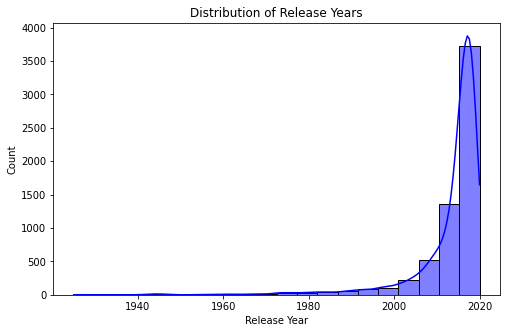

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='release_year', bins=20, kde=True, color='blue')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

### Select Features and Encode Categorical Variables
Features: 'release_year', 'genre', 'rating', 'duration'

In [36]:
features = ['release_year', 'genre', 'rating', 'duration']

One-hot encode categorical features ('genre', 'rating', 'duration')

In [37]:
df_encoded = pd.get_dummies(df[features], columns=['genre', 'rating', 'duration'], drop_first=True)

Define the feature set (X) and the target variable (y)

In [38]:
X = df_encoded
y = df['type_encoded']

Split the Data into Training and Testing Sets

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train a Logistic Regression Model
Initialize and train the Logistic Regression model

In [40]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Evaluate the Model (Make the predictions on the test set)

In [41]:
y_pred = logistic_model.predict(X_test)

Calculate Accuracy

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9983961507618284


Generate a classification report

In [43]:
classification_report_summary = classification_report(y_test, y_pred)
print('\nClassification Report:\n', classification_report_summary)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       831
           1       1.00      1.00      1.00       416

    accuracy                           1.00      1247
   macro avg       1.00      1.00      1.00      1247
weighted avg       1.00      1.00      1.00      1247



### Visualize Confusion matrix
Display the confusion 

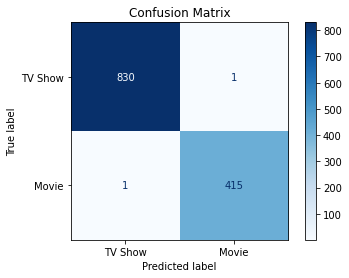

In [44]:
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test, display_labels=['TV Show', 'Movie'], cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Feature Importance
Visualize the importance of top features

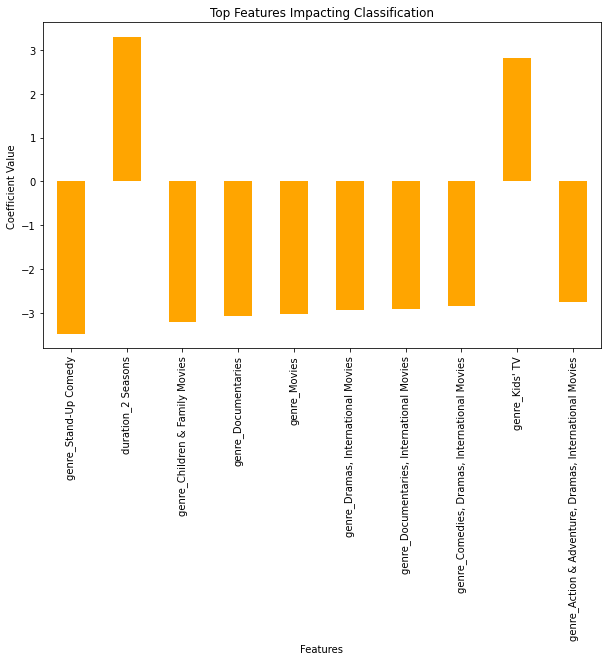

In [45]:
coefficients = pd.Series(logistic_model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
top_features = coefficients[:10]

plt.figure(figsize=(10, 6))
top_features.plot(kind='bar', color='orange')
plt.title('Top Features Impacting Classification')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

### The Logistic Regression model achieves a good accuracy on the test set. The classification report showed perfect precision, recall, and F1-scores for both classes (Movie and TV Show). The confusion matrix confirmed no misclassifications in the test data.

### Areas of improvment : Several areas can be explored to improve or validate the robustness of the solution such as checking for Overfitting, feature reduction or handling potential data leakage

### FIN !!!!!